# Quick start

Example workflow for basic usage of HEADSS with HDBSCAN. See "train.ipynb" for a detailed run through of the processes.

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from HEADSS import headss_merge
from matplotlib.colors import ListedColormap

In [2]:
'''Set up functions for saving plots and less intense colormaps'''

def reduce_intesity(cmap = 'prism', intensity = 0.75, plot = False): 
    '''Reduce the intensity of bright colormaps'''
    cmap = plt.cm.get_cmap(cmap)
    # Get the colormap colors, multiply them with the factor "a", and create new colormap
    my_cmap = cmap(np.arange(cmap.N))
    my_cmap[:,0:3] *= intensity
    my_cmap = ListedColormap(my_cmap)
    if plot:
        np.random.seed(1)
        data =  np.sort(np.random.rand(8,12))
        plt.figure()
        plt.subplot(121)
        c = plt.pcolor(data, edgecolors='k', linewidths=4, cmap=cmap, vmin=0.0, vmax=1.0)
        plt.colorbar(c)
        plt.subplot(122)
        c = plt.pcolor(data, edgecolors='k', linewidths=4, cmap=my_cmap, vmin=0.0, vmax=1.0)
        plt.colorbar(c)
        plt.show()
    return my_cmap

# Create less intense colormaps.
reduced_prism = reduce_intesity(cmap = 'prism', intensity = 0.85, plot = False)
reduced_tab20 = reduce_intesity(cmap = 'tab20', intensity = 0.85, plot = False)

In [3]:
'''Get example datasets'''
def open_txt_file(filename):
    '''opens txt files and returns as a list'''
    f = open(filename, "r")
    d = f.read()
    d = d.split('\n')
    return d

def getData(dataset, plot = False, ax = None, axis = True, fontsize = 16, size = 15):
    '''Opens example datasets returning them as a Pandas DataFrame'''
    
    filename = 'test_data/'
    known_types = ['Aggregation','a3','flame','pathbased','spiral','D31',
                   'birch1','jain','t4.8k', 'worms']
    # Open data
    if dataset == 'worms':
        data = open_txt_file(f'{filename}worms/worms_2d.txt')
    elif dataset != 'worms' and dataset in known_types:
        data = open_txt_file(f'{filename}{dataset}.txt')
    else:
        raise NameError(f'Known synthetic datatypes include {known_types}')
    data = [i.split() for i in data] # Split data types
    data = pd.DataFrame(data[:-1]).astype(float) # move into Pandas
    # Rename features as x,y ignoring additional columns
    data = data.rename(columns = {0:'x', 1:'y'})
    if plot: # Simple plotting feature for visualisation
        plotData(data = data, dataset = dataset, ax = ax, axis = axis, 
                 fontsize = fontsize, size = size)
    return data

def get_random_data(N = 100, cols = ['x', 'y', 'z'], plot = False):
    
    np.random.seed(42)
    data = np.random.random((N, len(cols)))*100
    data = pd.DataFrame(data, columns = cols)
    data = data.reset_index()
    if plot:
        plt.scatter(data['x'], data['y'])
        plt.show()
    return data

In [4]:
'''Get a random set of data [using "get_random_data(N)"] 
Or use one of the examples using "getData" or replace
by a dataset of your choice. '''

data = get_random_data(N = 1000)

In [6]:
'''Apply HEADSS to evaluate the chosen data'''
merge = headss_merge(df = data, N = 2, split_columns = ['x', 'y'], merge = True,
                      cluster_columns=['x','y'], min_cluster_size = 10, 
                      min_samples = 10, cluster_method = 'leaf', allow_single_cluster = False,
                 total_threshold = 0.1, overlap_threshold = 0.5, minimum_members = 10) 

# clustering result
merged_df = merge.members_df


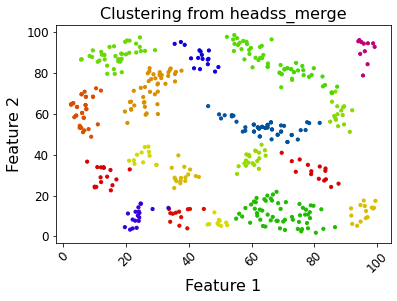

In [7]:
plt.scatter(merged_df.x, merged_df.y, c = merged_df.group, 
            cmap =reduced_prism, s = 10)
plt.xlabel('Feature 1', fontsize = 16)
plt.ylabel('Feature 2', fontsize = 16)
plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(rotation =  0, fontsize = 12)
plt.title('Clustering from headss_merge', fontsize = 16)
plt.show()